In [2]:
import pandas as pd

#1 Give a count of all videos currently out.

```
1. 
SELECT count(*)
FROM rental
WHERE Return_date IS NULL

```

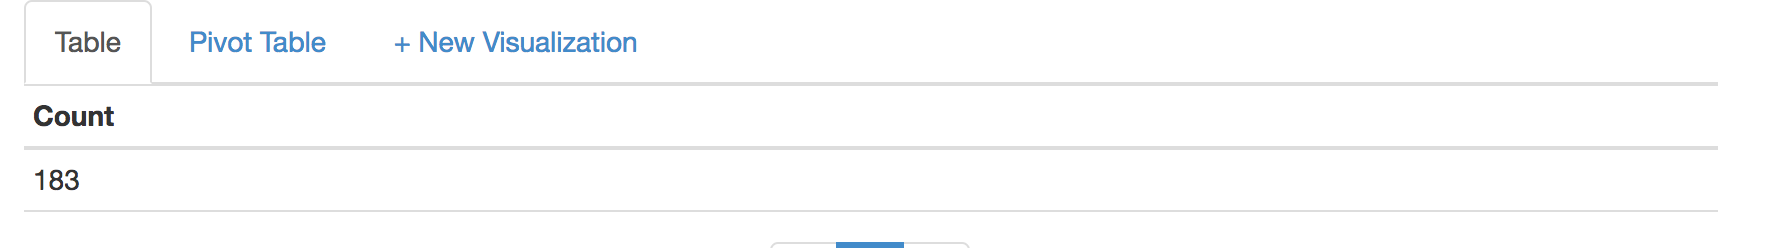

In [19]:
from IPython.display import Image
Image(filename='HW4 #1.PNG')

#2 Make a list of all customer names who have videos out and how much they owe.

```
2.SELECT id.customer_id,
       COUNT,
       c.first_name,
       c.last_name
FROM customer c
INNER JOIN
  (SELECT customer.customer_id,
          COUNT(inventory_id) COUNT
   FROM customer
   INNER JOIN rental ON customer.customer_id = rental.customer_id
   WHERE Return_date IS NULL
   GROUP BY customer.customer_id) id ON id.customer_id = c.customer_id
  ```

In [10]:
H_2 = pd.read_csv("HW4 #2.csv")

In [12]:
H_2 [1:11]

,rental_hour,count
1,8.0,696
2,0.0,694
3,18.0,688
4,3.0,684
5,4.0,681
6,19.0,676
7,10.0,673
8,21.0,671
9,7.0,667
10,16.0,664


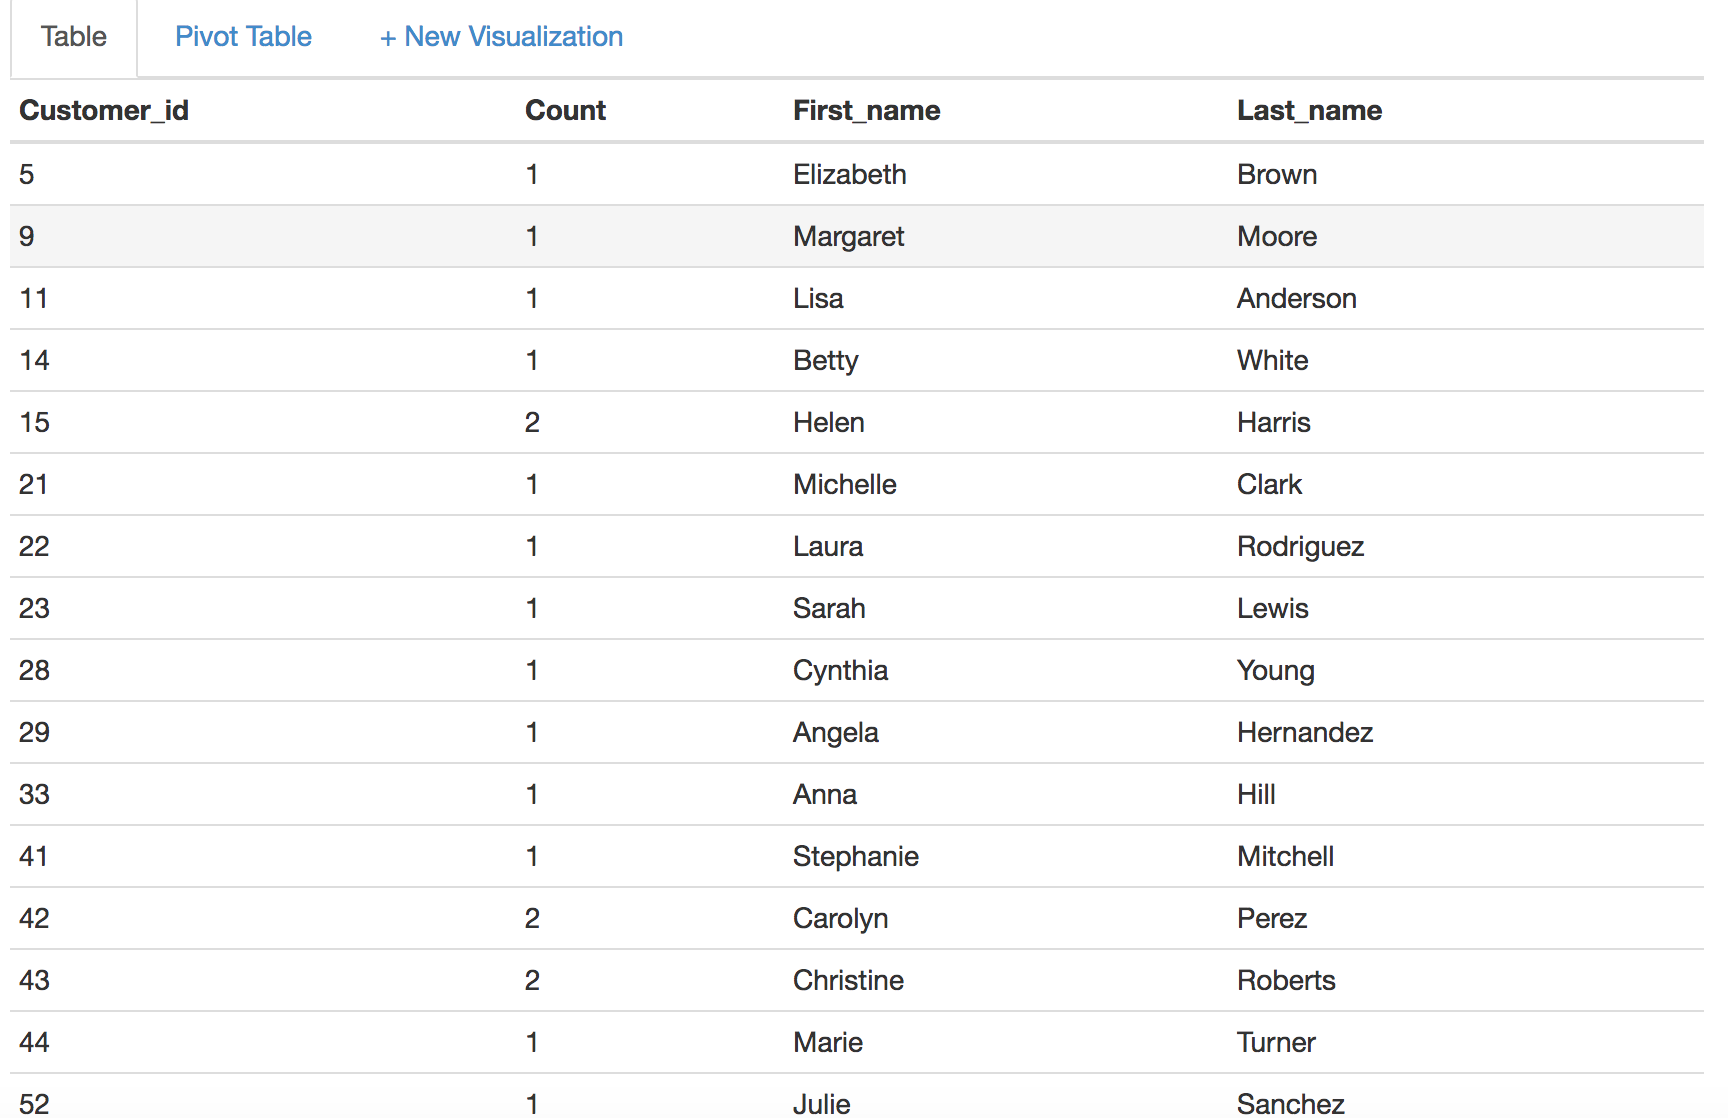

In [20]:
Image(filename='HW4 #2.PNG')

#5 What hour of the day to people rent the most ?

```
5.
SELECT rental_hour,
       count(*)
FROM
  (SELECT extract(hour
                  FROM rental_date) AS rental_hour
   FROM rental) AS rental_time
GROUP BY 1
ORDER BY 2 DESC
```

In [14]:
H_5 = pd.read_csv("HW4 #4.csv")

In [15]:
H_5[1:11]

,customer_id,count,first_name,last_name
1,9,1,Margaret,Moore
2,11,1,Lisa,Anderson
3,14,1,Betty,White
4,15,2,Helen,Harris
5,21,1,Michelle,Clark
6,22,1,Laura,Rodriguez
7,23,1,Sarah,Lewis
8,28,1,Cynthia,Young
9,29,1,Angela,Hernandez
10,33,1,Anna,Hill


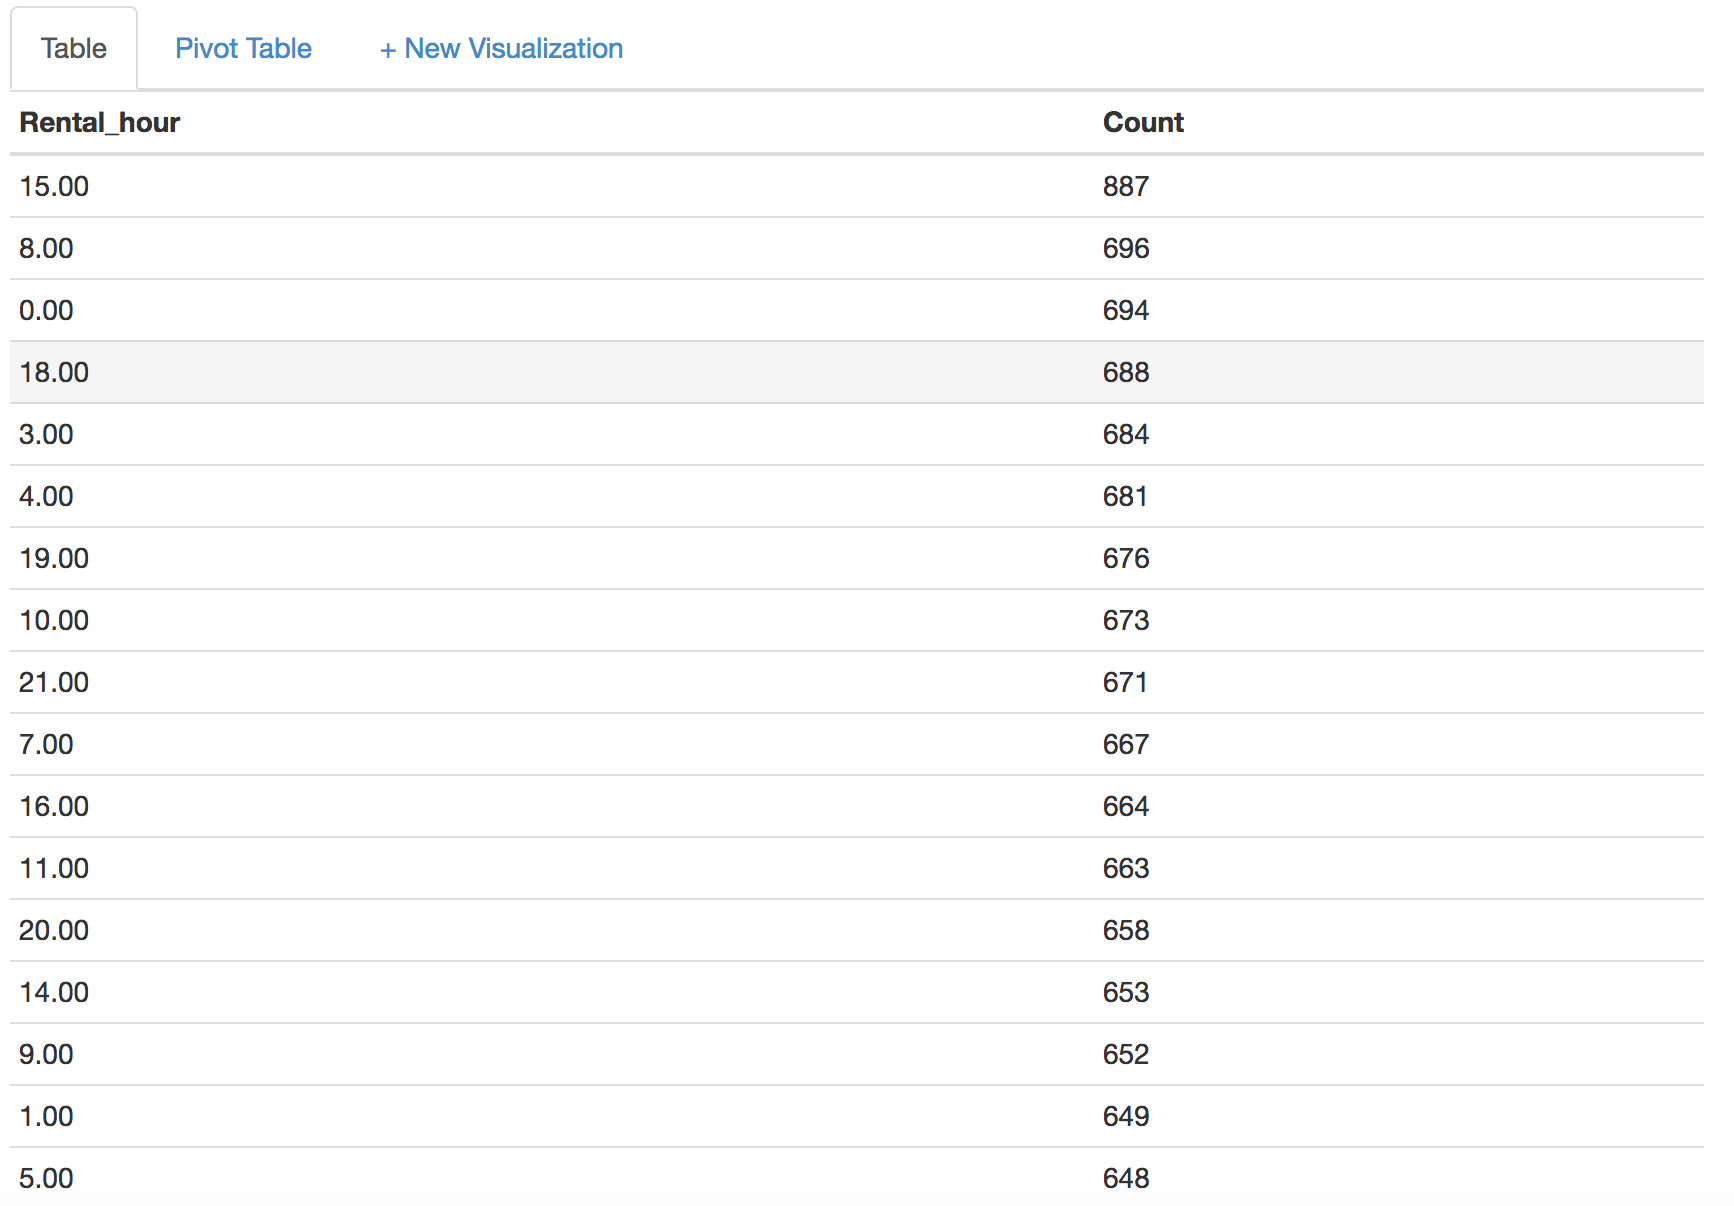

In [6]:
Image(filename='HW4 #5.PNG')

15:00 is the hour people rent the most

#7 Given a movie name, find out movies to recommend, based on the most popular movies rented by people who rented *that* movie.

```
7. 
SELECT f.film_id,
       f.title,
       film_id_count.count
FROM
  (SELECT i.film_id,
          count(i.film_id) COUNT
   FROM inventory i
   INNER JOIN
     (SELECT r.customer_id,
             r.inventory_id
      FROM
        (SELECT r.customer_id
         FROM
           (SELECT i.inventory_id,
                   i.film_id
            FROM inventory i
            INNER JOIN film f ON f.film_id = i.film_id
            WHERE f.film_id = '1') extract_inventory_id
         INNER JOIN rental r ON r.inventory_id= extract_inventory_id.inventory_id) extract_customer_who_rented
      INNER JOIN rental r ON r.customer_id = extract_customer_who_rented.customer_id) inventoryid_customer_rented ON i.inventory_id = inventoryid_customer_rented.inventory_id
   GROUP BY 1
   ORDER BY 2 DESC) film_id_count
INNER JOIN film f ON f.film_id = film_id_count.film_id
```

In [16]:
H_7 =pd.read_csv("HW4 #7.csv")

In [17]:
H_7[1:11]

,film_id,title,count
1,203,Daisy Menagerie,4
2,489,Juggler Hardly,4
3,415,High Encino,4
4,285,English Bulworth,4
5,367,Goldmine Tycoon,3
6,843,Steel Santa,3
7,361,Gleaming Jawbreaker,3
8,119,Caper Motions,3
9,239,Dogma Family,3
10,477,Jawbreaker Brooklyn,3


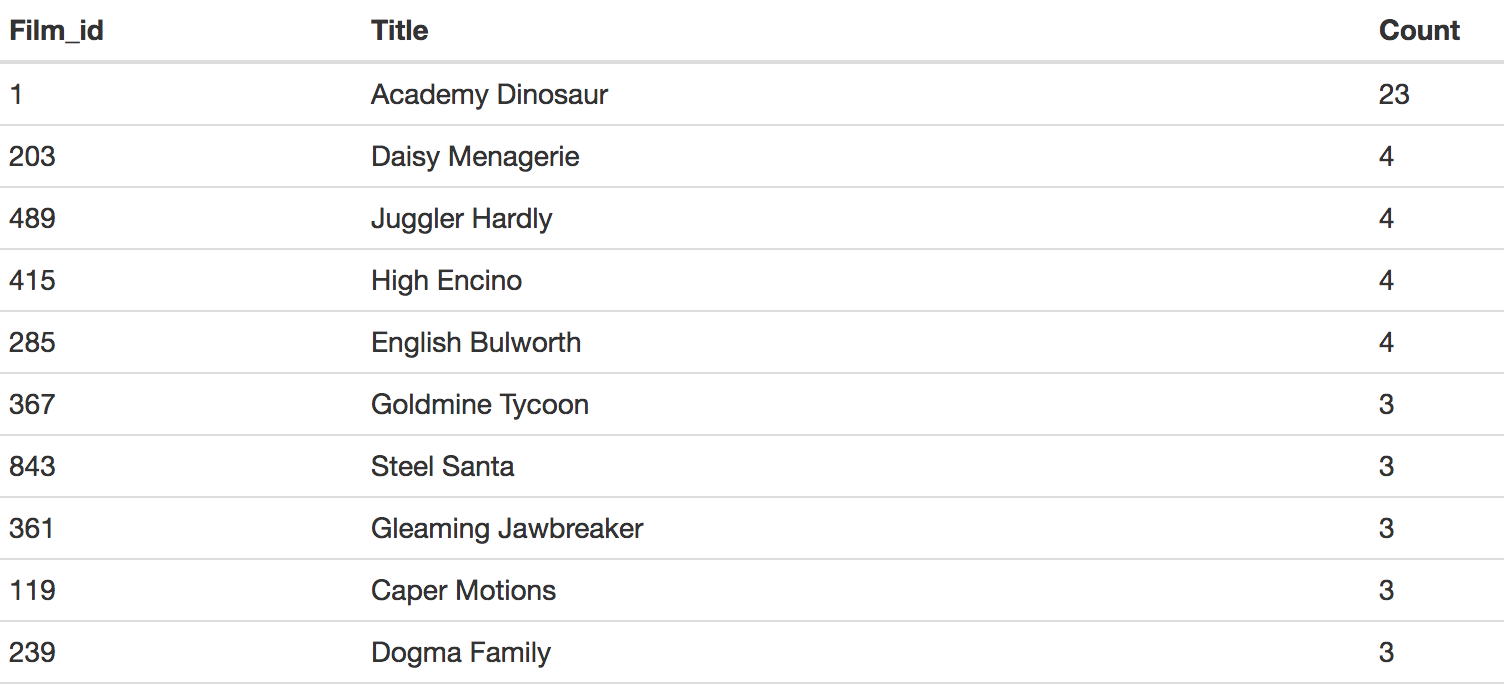

In [21]:
Image(filename='HW4 #7.PNG')

In this case, I select film that has film_id = 1. For the other cases, we can easily do the same recommendation by changing film_id in the code.